# Rental Prices in 100 Largest U.S. Cities
While scrolling through Twitter a year ago, I noticed a visualization highlighting the increasing cost of renting. The data was looking at the 100 largest U.S. cities:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Rents are rising quickly… everywhere. Here’s monthly rent growth for the top 100 U.S. cities, ordered by population, visualized for the past few years (short thread) <a href="https://t.co/xzCqagLLD8">pic.twitter.com/xzCqagLLD8</a></p>&mdash; Igor Popov (@IAPopov) <a href="https://twitter.com/IAPopov/status/1418239796514680833?ref_src=twsrc%5Etfw">July 22, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

The visual was interesting, but what bothered me was the seasonality of the data - prices clearly rose in spring/summer and dropped in fall/winter, a yearly cycle. Also, currently (fall 2022) home prices seem to be on a downward trajectory, but is the same happening in rental prices? 

Fortunately, the tweet links to the data source, so we can go get the data, download it, and see for ourselves!

## Getting the data
First things first, we need to actually go and get the data. 
- Data source: apartmentlist.com (apartmentlist.com/research/category/data-rent-estimates)

A quick look makes it seem like it's going to be less than straight forward to figure out how to download the data via `requests`, and the actual data isn't that large, so I went ahead and just downloaded the data that I needed with a few clicks from the webpage. Now we're ready to go!

In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt

# Some additional parameters to make working with different
# files a little easier
loc_col = 'City_Name'       # Defines the location column

In [2]:
df = pd.read_csv('../data/Apartment_List_Rent_Estimates_City_2022_10.csv',
                 na_values=['     NA'])
df = df.drop(columns='FIPS_Code')       # Drop column we're not going to use
df

,City_Name,Population,Bedroom_Size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,...,2022_01,2022_02,2022_03,2022_04,2022_05,2022_06,2022_07,2022_08,2022_09,2022_10
0,"Birmingham, AL",212297,_Overall,790.0,797.0,804.0,812.0,820.0,830.0,839.0,...,1012.0,1021.0,1027.0,1039.0,1056.0,1075.0,1083.0,1079.0,1060.0,1046.0
1,"Birmingham, AL",212297,1br,665.0,671.0,677.0,684.0,691.0,699.0,706.0,...,852.0,860.0,865.0,875.0,889.0,906.0,913.0,909.0,893.0,881.0
2,"Birmingham, AL",212297,2br,776.0,784.0,790.0,798.0,807.0,816.0,825.0,...,995.0,1004.0,1009.0,1021.0,1038.0,1057.0,1065.0,1061.0,1043.0,1029.0
3,"Hoover, AL",85175,_Overall,1114.0,1119.0,1116.0,1114.0,1116.0,1103.0,1104.0,...,1461.0,1460.0,1462.0,1459.0,1481.0,1514.0,1546.0,1557.0,1544.0,1515.0
4,"Hoover, AL",85175,1br,946.0,950.0,947.0,945.0,947.0,936.0,937.0,...,1240.0,1239.0,1241.0,1238.0,1257.0,1285.0,1312.0,1321.0,1310.0,1285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,"Madison, WI",254977,1br,926.0,955.0,1000.0,1022.0,1043.0,1055.0,1050.0,...,1200.0,1220.0,1234.0,1254.0,1274.0,1299.0,1323.0,1355.0,1374.0,1401.0
1757,"Madison, WI",254977,2br,1098.0,1132.0,1186.0,1211.0,1236.0,1250.0,1245.0,...,1422.0,1446.0,1462.0,1486.0,1510.0,1539.0,1568.0,1606.0,1629.0,1660.0
1758,"Milwaukee, WI",594548,_Overall,862.0,892.0,887.0,878.0,869.0,868.0,867.0,...,956.0,963.0,972.0,981.0,991.0,1003.0,1008.0,1013.0,1014.0,1009.0
1759,"Milwaukee, WI",594548,1br,711.0,736.0,732.0,725.0,717.0,716.0,716.0,...,789.0,794.0,802.0,810.0,818.0,828.0,832.0,836.0,836.0,832.0


In [3]:
date_cols = []
for col in df.columns:
    if re.match(r'[0-9]{4}_[0-9]{2}', col):
        df[col] = df[col].astype(float)
        date_cols.append(col)

In [4]:
# Collapse the date columns into a new column that references the date
df = df.melt(id_vars=[loc_col,'Population','Bedroom_Size'], 
             var_name='Date', 
             value_name='Price')

# Convert date column to an actual datetime
df.Date = pd.to_datetime(df.Date, format='%Y_%m')
df

,City_Name,Population,Bedroom_Size,Date,Price
0,"Birmingham, AL",212297,_Overall,2017-01-01,790.0
1,"Birmingham, AL",212297,1br,2017-01-01,665.0
2,"Birmingham, AL",212297,2br,2017-01-01,776.0
3,"Hoover, AL",85175,_Overall,2017-01-01,1114.0
4,"Hoover, AL",85175,1br,2017-01-01,946.0
...,...,...,...,...,...
123265,"Madison, WI",254977,1br,2022-10-01,1401.0
123266,"Madison, WI",254977,2br,2022-10-01,1660.0
123267,"Milwaukee, WI",594548,_Overall,2022-10-01,1009.0
123268,"Milwaukee, WI",594548,1br,2022-10-01,832.0


## Compute some simple stats
Let's see who has the highest and lowest `Overall` rent currently

In [5]:
# Sort the 'Overall' rent values for the most recent month by price 
rent_sorted = df[(df.Date == dt.datetime(2022,10,1)) &
                 (df.Bedroom_Size == '_Overall')] \
                .sort_values('Price',ascending=False)
# Compute largest rent                
max_rent = rent_sorted.iloc[0]
print('Highest overall rent prices:')
print(f'\tCity: {max_rent[loc_col]} (Pop: {max_rent["Population"]})')
print(f'\tRent: ${max_rent["Price"]:.2f}')
# Compute lowest rent
min_rent = rent_sorted.iloc[-1]
print('Lowest overall rent prices:')
print(f'\tCity: {min_rent[loc_col]} (Pop: {min_rent["Population"]})')
print(f'\tRent: ${min_rent["Price"]:.2f}')

Highest overall rent prices:
	City: Marina del Rey, CA (Pop: 9852)
	Rent: $4835.00
Lowest overall rent prices:
	City: Cleveland, OH (Pop: 385282)
	Rent: $803.00


Here are the cities with the lowest/highest rent as of October 2022:
* Lowest overall rent prices: **Cleveland, OH** ($803)
* Highest overall rent prices: **Marina del Rey, CA** ($4,835)

## Let's do what we came here to do
Enough fooling around, let's actually do some plotting and looking at trends in rental price changes.

In [6]:
df_pivoted = df.pivot(index=[loc_col, 'Population', 'Bedroom_Size'], 
                      columns=['Date'], 
                      values=['Price']) \
               .sort_values('Population', ascending=False) \
               .dropna(how='all') \
               .loc[:,('Price')]
df_pivoted

Date                                       2017-01-01  2017-02-01  2017-03-01  \
City_Name         Population Bedroom_Size                                       
New York City, NY 8419316    1br               1641.0      1643.0      1658.0   
                             2br               1733.0      1735.0      1751.0   
                             _Overall          1717.0      1719.0      1735.0   
Los Angeles, CA   3966936    2br               1940.0      1938.0      1943.0   
                             1br               1469.0      1468.0      1471.0   
...                                               ...         ...         ...   
Glendale, CO      5177       1br               1147.0      1187.0      1202.0   
Jonesboro, GA     4771       _Overall           749.0       755.0       772.0   
                             1br                607.0       612.0       626.0   
Lithonia, GA      2778       _Overall           797.0       790.0       806.0   
                             2br                819.0       813.0       829.0   

Date                                       2017-04-01  2017-05-01  2017-06-01  \
City_Name         Population Bedroom_Size                                       
New York City, NY 8419316    1br               1673.0      1707.0      1724.0   
                             2br               1767.0      1802.0      1821.0   
                             _Overall          1751.0      1786.0      1804.0   
Los Angeles, CA   3966936    2br               1933.0      1947.0      1955.0   
                             1br               1464.0      1474.0      1480.0   
...                                               ...         ...         ...   
Glendale, CO      5177       1br               1194.0      1191.0      1203.0   
Jonesboro, GA     4771       _Overall           775.0       780.0       781.0   
                             1br                629.0       633.0       633.0   
Lithonia, GA      2778       _Overall           826.0       836.0       852.0   
                             2br                849.0       860.0       877.0   

Date                                       2017-07-01  2017-08-01  2017-09-01  \
City_Name         Population Bedroom_Size                                       
New York City, NY 8419316    1br               1737.0      1731.0      1719.0   
                             2br               1834.0      1827.0      1815.0   
                             _Overall          1818.0      1811.0      1799.0   
Los Angeles, CA   3966936    2br               1954.0      1962.0      1967.0   
                             1br               1480.0      1486.0      1489.0   
...                                               ...         ...         ...   
Glendale, CO      5177       1br               1229.0      1226.0      1237.0   
Jonesboro, GA     4771       _Overall           784.0         NaN       754.0   
                             1br                636.0         NaN       612.0   
Lithonia, GA      2778       _Overall           862.0       869.0       878.0   
                             2br                886.0       894.0       903.0   

Date                                       2017-10-01  ...  2022-01-01  \
City_Name         Population Bedroom_Size              ...               
New York City, NY 8419316    1br               1712.0  ...      1878.0   
                             2br               1807.0  ...      1983.0   
                             _Overall          1791.0  ...      1965.0   
Los Angeles, CA   3966936    2br               1964.0  ...      2143.0   
                             1br               1487.0  ...      1623.0   
...                                               ...  ...         ...   
Glendale, CO      5177       1br               1226.0  ...      1375.0   
Jonesboro, GA     4771       _Overall           743.0  ...      1246.0   
                             1br                602.0  ...      1011.0   
Lithonia, GA      2778  

In [7]:
def compute_prcnt_chng(m_delta: int = 1):
    columns = sorted(df_pivoted.columns)
    # Setup an empty DataFrame
    df_prcntdiff = pd.DataFrame(index=df_pivoted.index)
    # Loop over all the date columns and compute percentage change
    delta = m_delta
    for c,col in enumerate(columns[delta:], start=delta):
        curr_val = df_pivoted[col]
        prev_val = df_pivoted[columns[c-delta]]
        df_prcntdiff[col.strftime('%Y-%m')] = 100*(curr_val - prev_val)/prev_val
    df_prcntdiff=df_prcntdiff.reset_index()

    df_overall = df_prcntdiff[df_prcntdiff.Bedroom_Size == '_Overall']
    df_overall = df_overall.sort_values('Population', ascending=False) \
                           .reset_index(drop=True) \
                           .iloc[:100]
    return df_overall

In [8]:
# ===========================================
# Define histogram plotting function
# ===========================================
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data_heatmap(data:pd.DataFrame,
                      title:str,
                      vmin:float=None,
                      vmax:float=None) -> None:
    # Get the formatted data for plotting
    plt_data = data.drop(columns=['Population','Bedroom_Size']) \
                   .set_index(loc_col)
    
    # Create the heatmap
    plt.subplots(figsize=(10,10))
    ax = sns.heatmap(plt_data, center=0, vmin=vmin, vmax=vmax,
                    cmap='RdBu_r',
                    cbar_kws={'label': title,
                            'location': 'top',
                            'aspect': 40,
                            'shrink': .8,
                            'format': "%0.0f%%"},
                    edgecolors='black')

    # Draw lines for the year boundaries
    year_start = [i for i,col in enumerate(plt_data.columns) if '-01' in col]
    ax.vlines(year_start, 0,100, colors=['black'], linestyles=['dotted'])

    # Y-axis
    ax.set(ylabel='100 Largest U.S. Cities')
    ax.set_yticks(ticks=[0.5,99.5],
                labels=[f'Most Populous\n({plt_data.index[0]})',
                        f'Least Populous\n({plt_data.index[-1]})'])
    # X-axis
    ax.set_xticks(ticks=[i for i,x in enumerate(plt_data.columns) if '-01' in x or i == 0],
                labels=[x[:4] for i,x in enumerate(plt_data.columns) if '-01' in x or i == 0])
    ax.xaxis.tick_top()

In [9]:
# ===========================================
# Define line plotting function, generating
# one line plot for each city in plots split
# out by state
# ===========================================
def plot_data_line(data:pd.DataFrame) -> None:
    # Format the data 
    plt_data = data.drop(columns=['Population','Bedroom_Size']) \
                   .set_index(loc_col)
    scat_data = plt_data.reset_index().melt(id_vars=[loc_col], var_name='Date',value_name='YoY Change')
    scat_data['State'] = [x.split(',')[1][1:3] for x in scat_data[loc_col]]
    scat_data = scat_data.sort_values(['Date','State'])
    
    # Create the FacetGrid by state
    grid = sns.FacetGrid(scat_data, col='State', hue=loc_col, col_wrap=5)
    
    # Reference line at %-change = 0
    grid.refline(y=0, linestyle=':')

    # Grid lines for the years
    for i,x in enumerate(sorted(plt_data.columns)):
        if '-01' in x:
            grid.refline(x=i, linestyle=':')
    
    # Add data points
    grid.map(plt.plot, 'Date', 'YoY Change', marker='', linestyle='-')

    # Define the x-ticks and labels
    grid.set(xticks=[i for i,x in enumerate(plt_data.columns) if '-01' in x or i == 0])
    grid.set_xticklabels(labels=[x[:4] for i,x in enumerate(plt_data.columns) if '-01' in x or i == 0])
    grid.fig.tight_layout(w_pad=0)


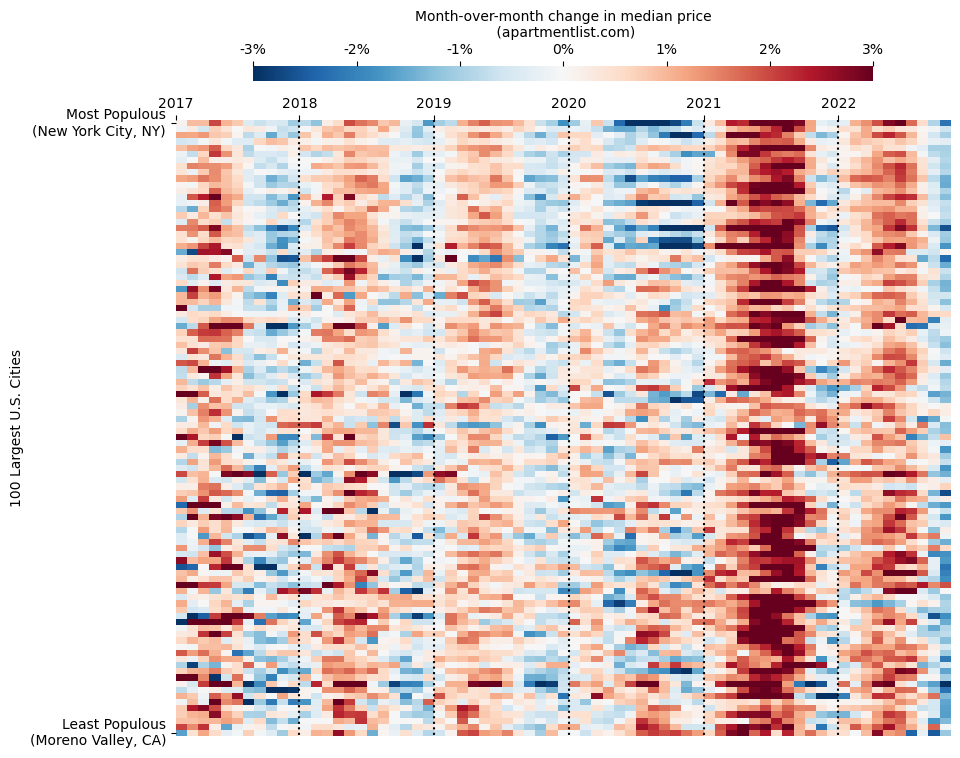

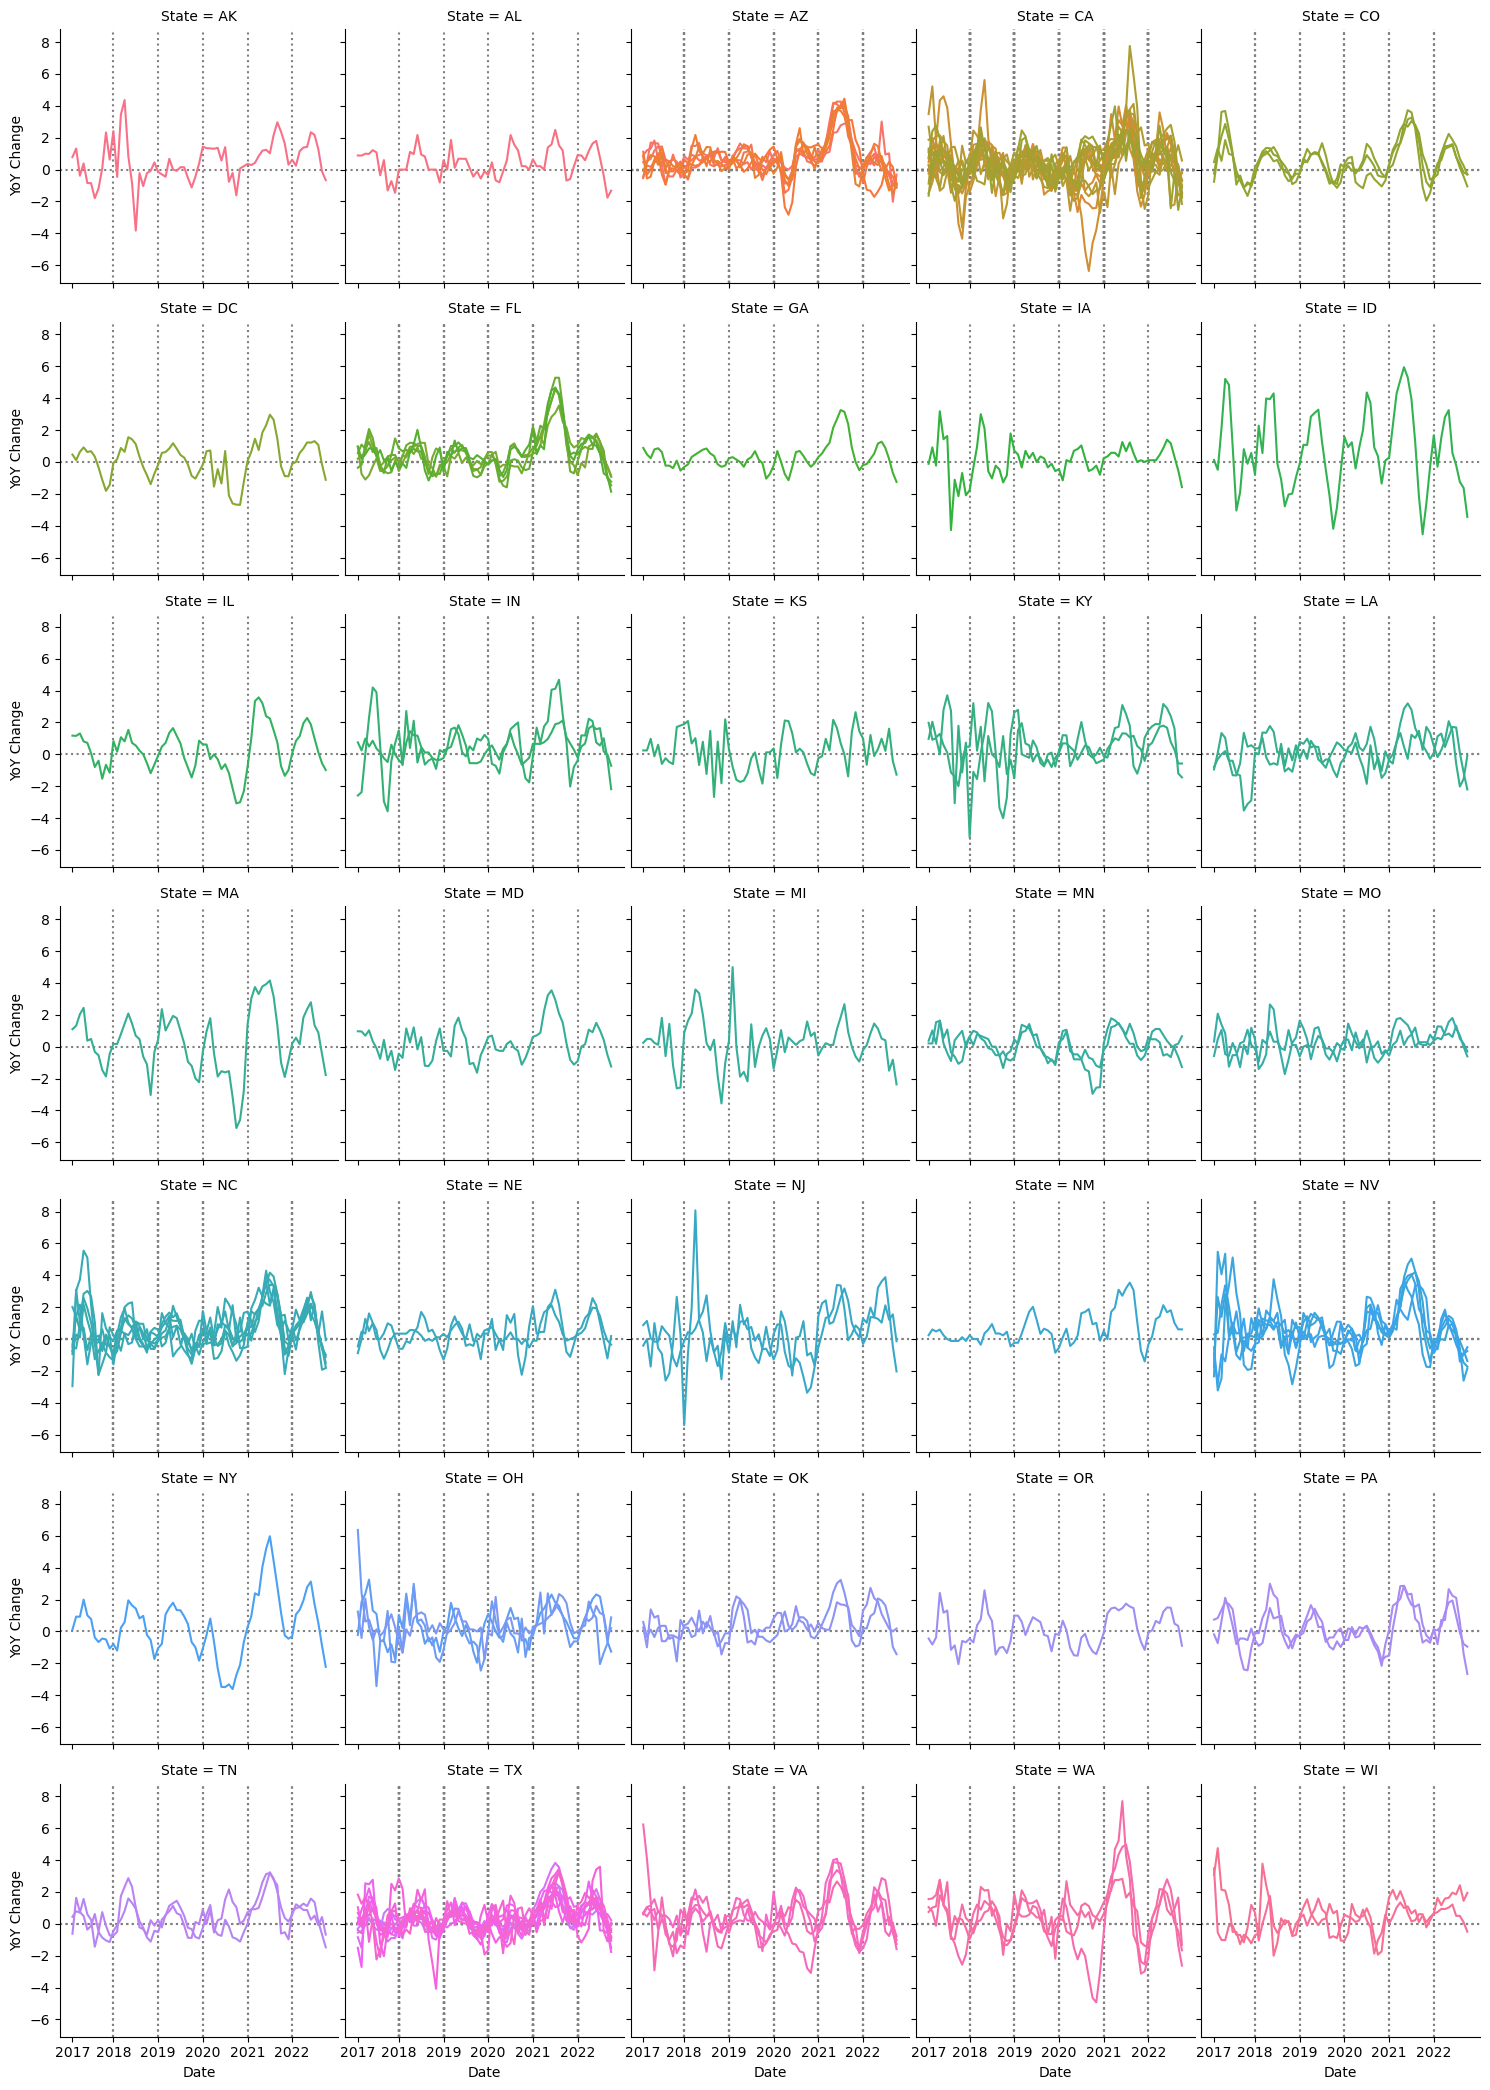

In [10]:
# Plot the month-over-month data
df_mom = compute_prcnt_chng(1)
plot_data_heatmap(df_mom, 
                  title='Month-over-month change in median price\n (apartmentlist.com)',
                  vmin=-3, vmax=3)
plot_data_line(df_mom)

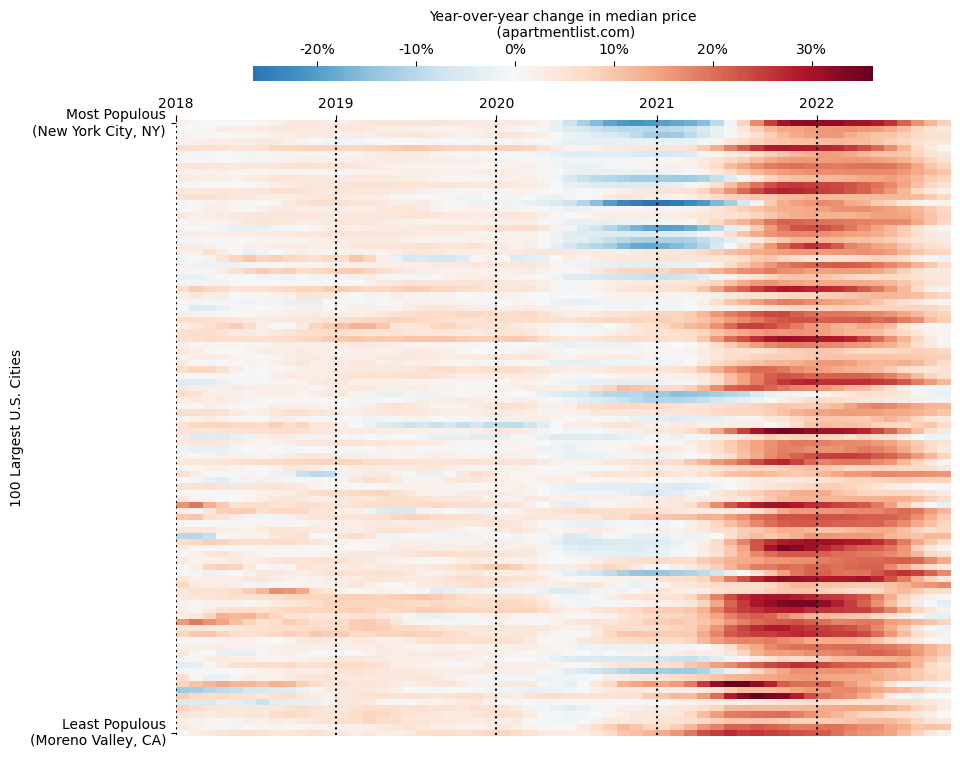

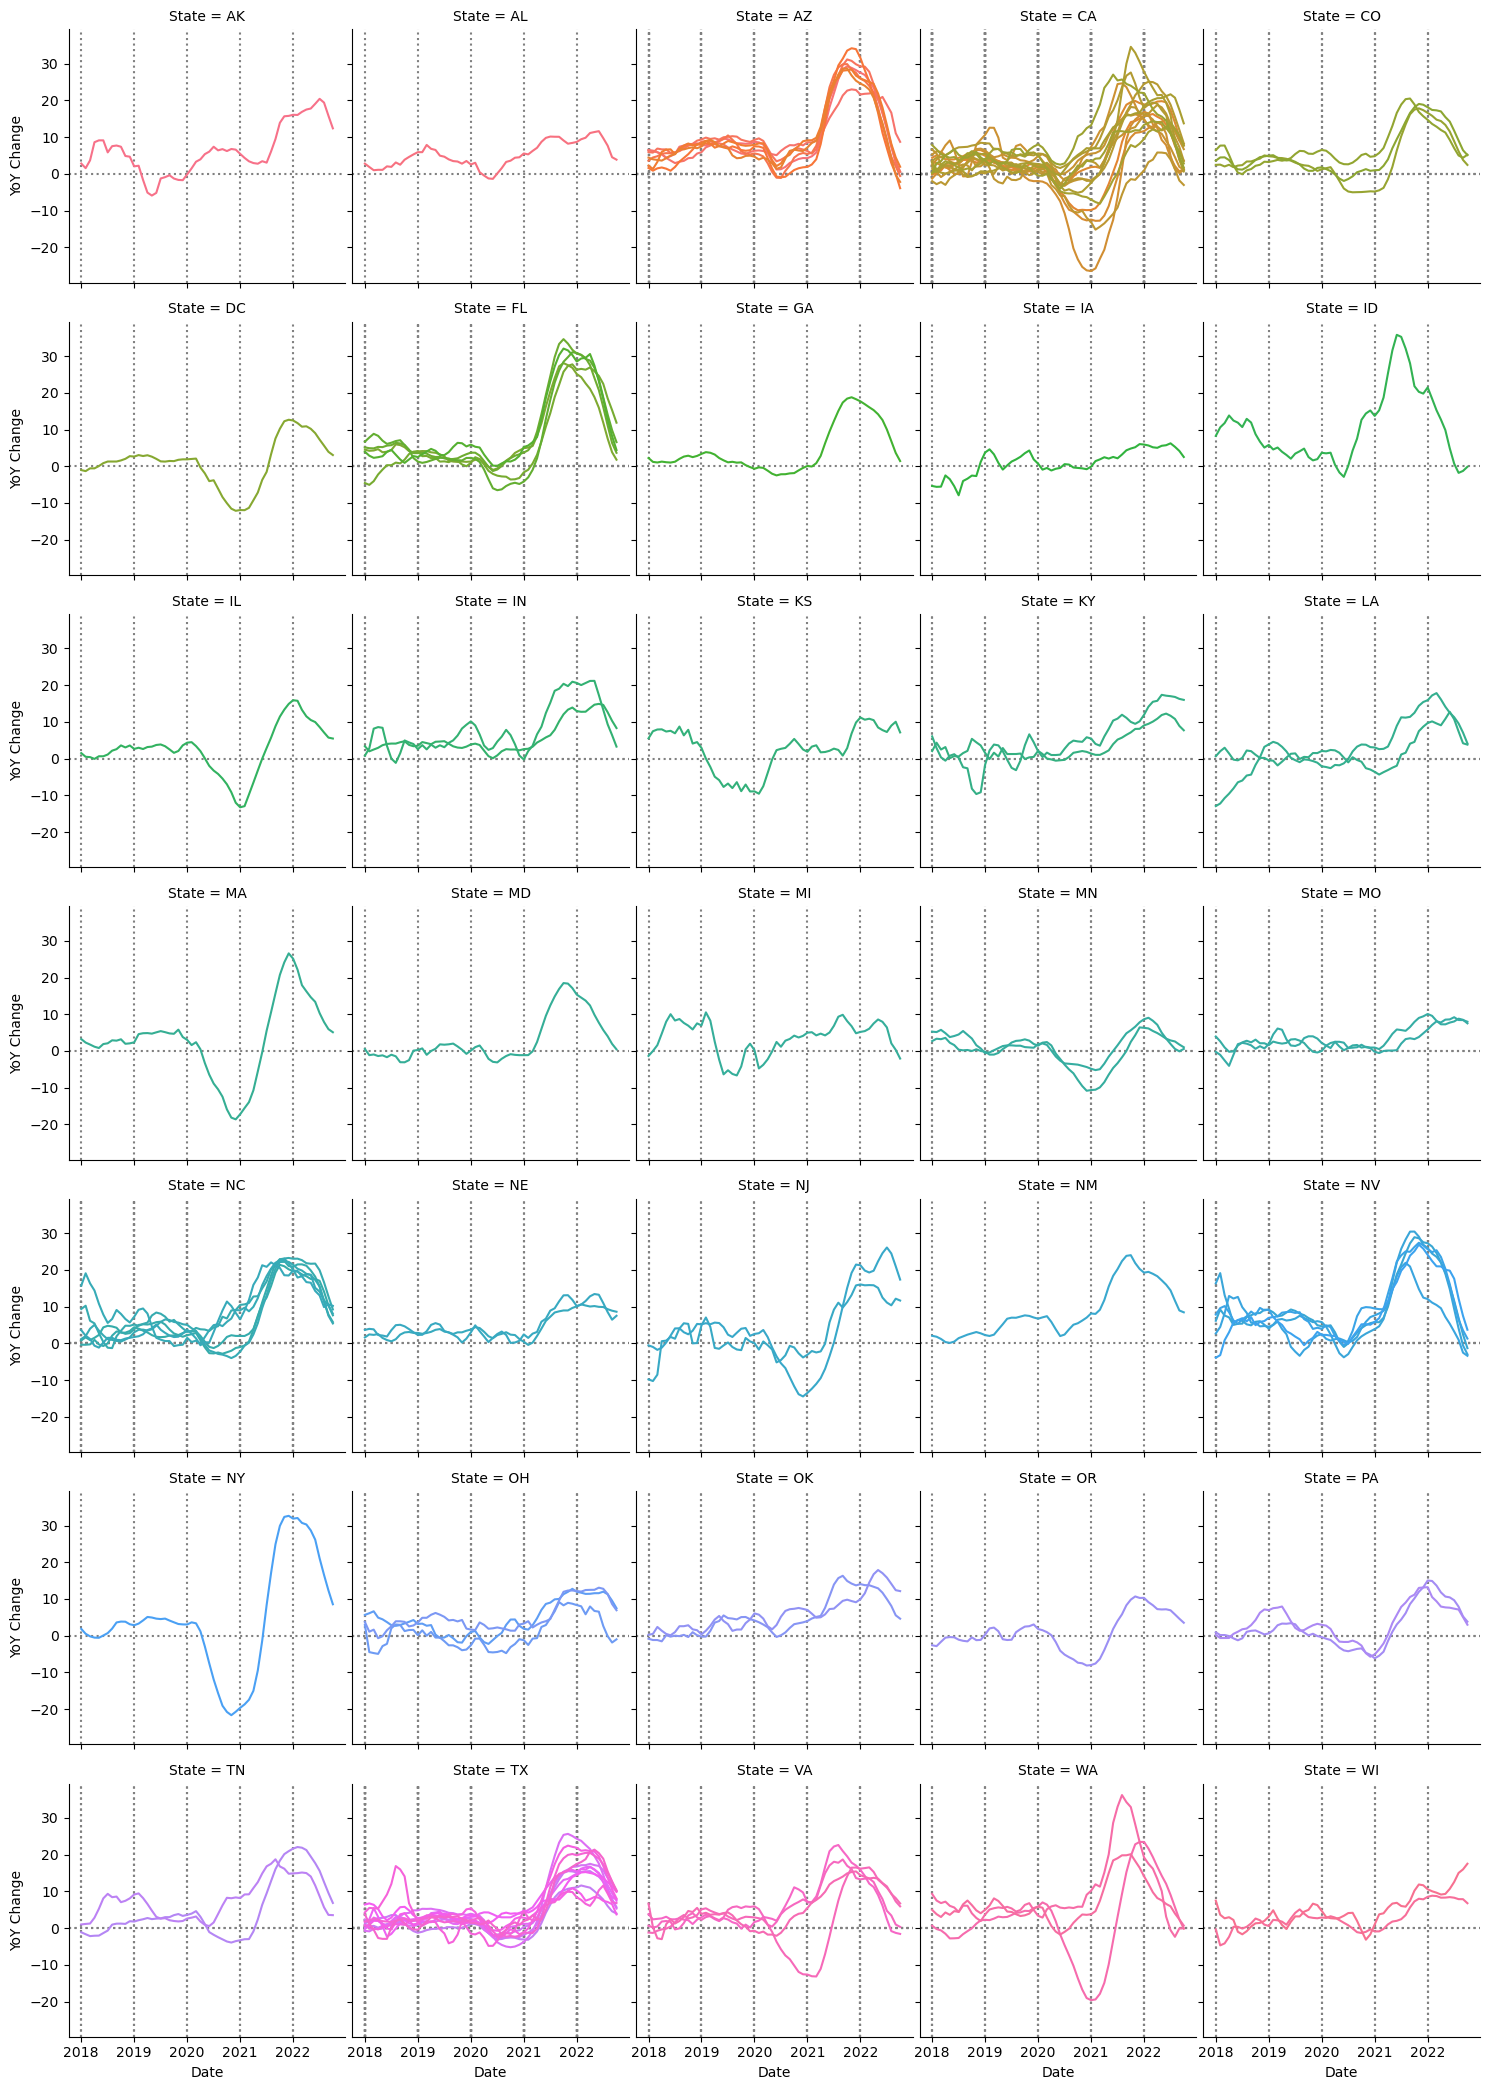

In [11]:
# Plot the year-over-year data
df_yoy = compute_prcnt_chng(12)
plot_data_heatmap(df_yoy, 
                  title='Year-over-year change in median price\n (apartmentlist.com)')
plot_data_line(df_yoy)

Another thing we can ask ourselves is who had the highest/lowest year-over-year change in rental prices? 

In [12]:
# Melt the YoY data
df_yoy_sorted = df_yoy.melt(id_vars=[loc_col, 'Population','Bedroom_Size'],
                            var_name='Date',
                            value_name='Percent Change') \
                      .sort_values('Percent Change',ascending=False)
df_yoy_sorted['State'] = [x.split(',')[1] for x in df_yoy_sorted[loc_col]]
df_yoy_minmax = df_yoy_sorted.iloc[[0,-1]]
df_yoy_minmax

,City_Name,Population,Bedroom_Size,Date,Percent Change,State
4393,"Spokane, WA",217353,_Overall,2021-08,36.221294,WA
3613,"San Francisco, CA",874961,_Overall,2021-01,-26.443648,CA


Here are the cities with the most extreme +/- change in rent prices as of October 2022:
* Lowest %-drop in rent prices: **San Francisco, CA** (-26.4%, Jan 2021)
* Highest %-drop in rent prices: **Spokane, WA** (+36.2%, Aug 2021)

How many cities have experienced >30% increases in rent prices since the beginning of 2021?

In [13]:
df_yoy_sorted.Date = pd.to_datetime(df_yoy_sorted.Date, format='%Y-%m')
df_yoy_sorted[(df_yoy_sorted.Date >= dt.datetime(2021,1,1)) &
              (df_yoy_sorted['Percent Change'] >= 30)] \
             .drop_duplicates(loc_col, keep='first') \
             .reset_index(drop=True)

,City_Name,Population,Bedroom_Size,Date,Percent Change,State
0,"Spokane, WA",217353,_Overall,2021-08-01,36.221294,WA
1,"Boise, ID",226115,_Overall,2021-06-01,35.777998,ID
2,"Tampa, FL",387916,_Overall,2021-10-01,34.606205,FL
3,"Irvine, CA",273157,_Overall,2021-10-01,34.589331,CA
4,"Scottsdale, AZ",250602,_Overall,2021-11-01,34.201508,AZ
5,"New York City, NY",8419316,_Overall,2021-12-01,32.637954,NY
6,"St. Petersburg, FL",261338,_Overall,2021-10-01,32.037194,FL
7,"Mesa, AZ",499720,_Overall,2021-10-01,31.158798,AZ
8,"Orlando, FL",280832,_Overall,2021-12-01,31.040413,FL
9,"Henderson, NV",300116,_Overall,2021-10-01,30.438010,NV


Turns out there were 10 cities that saw rent prices 

## Conclusions
So we've seen that rent prices rose dramatically in 2021. Additionally, we see that the price increases have been tapering off recently. However, we should note that most of the percentage changes are still positive, indicating prices are still rising just not as fast as they were a year ago.